**What is Hierarchical Risk Parity (HRP)?**

**HRP** is a new portfolio optimization technique developed by Marcos Lopez de Prado (2016). This model consist of the following three steps:

   **Hierarchical Tree Clustering**: we take advantage of the relationship among financial assets (correlation) to create a hierarchical structure that can be plotted as a dendrogram.
   
   **Matrix Seriation**: we sort the assets in the dendrogram minimizing the distance between leafs, Lopez de Prado called this process quasi-diagonalization.
    
   **Recursive Bisection**: we split the weights along the dendrogram using naive risk parity (weights based on the inverse of asset’s risk) from the top of the tree to the leafs.

In [1]:
# !pip install Riskfolio-Lib

# 1. Importing Dataset and Libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2019-01-01'
end = '2021-12-31'

In [3]:
data = yf.download('RELIANCE.NS INFY.NS HDFCBANK.NS ICICIBANK.NS ', start='2018-04-01', end='2021-03-31', progress=False)

In [4]:
data = data['Close']

In [5]:
data = data.pct_change().dropna()

In [6]:
data.head()

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS
Date,,,,
2018-04-03,-0.7922%,3.1316%,0.2902%,0.7391%
2018-04-04,-1.7042%,-0.5184%,-1.4249%,-0.5169%
2018-04-05,1.3620%,3.7223%,2.0770%,1.4862%
2018-04-06,0.7596%,0.7177%,-1.7908%,0.3083%
2018-04-09,0.8137%,0.0713%,-1.3975%,0.5488%


In [10]:
data = pd.read_csv("data1_returns.csv",index_col=0,).dropna(axis=1)

In [17]:
data.shape

(312, 13)

**To see the hierarchical relationship among the assets, we can plot a dendrogram**

# 2. Plotting the Dendrogram using RP library

In [12]:
import riskfolio as rp

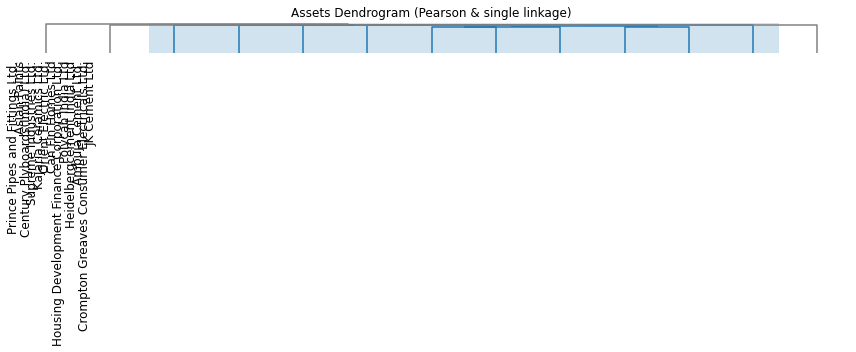

In [45]:
# Plotting Assets Clusters

ax = rp.plot_dendrogram(returns=data,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=15,
                        leaf_order=True,
                        ax=None)

**Then we need to build the HCPortfolio object, this object contains all portfolio models based on the hierarchical relationship among assets:**

# 3. Building the portfolio object

In [46]:
# Building the portfolio object
port = rp.HCPortfolio(returns=data)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 2 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w.T)

,Ambuja Cement Ltd.,Asian Paints,Can Fin Homes Ltd,Century Plyboards(India) Ltd.,Crompton Greaves Consumer Electricals Ltd.,Housing Development Finance Corporation Ltd.,Heidelbergcement India Ltd,JK Cement Ltd,Kajaria Ceramics Ltd.,Orient Electric Ltd.,Polycab India Ltd,Prince Pipes and Fittings Ltd.,Supreme Industries Ltd.
weights,7.7739%,12.9104%,6.9456%,7.1709%,9.2214%,5.1627%,6.4651%,8.1130%,8.0994%,5.7861%,5.2677%,5.8549%,11.2289%


In [47]:
w

,weights
Ambuja Cement Ltd.,7.7739%
Asian Paints,12.9104%
Can Fin Homes Ltd,6.9456%
Century Plyboards(India) Ltd.,7.1709%
Crompton Greaves Consumer Electricals Ltd.,9.2214%
Housing Development Finance Corporation Ltd.,5.1627%
Heidelbergcement India Ltd,6.4651%
JK Cement Ltd,8.1130%
Kajaria Ceramics Ltd.,8.0994%
Orient Electric Ltd.,5.7861%


**As you can see, we get the optimal portfolio based on HRP in few steps. If we want to see the structure of the portfolio, we can plot a pie chart:**

# 4. Plotting the composition of the portfolio

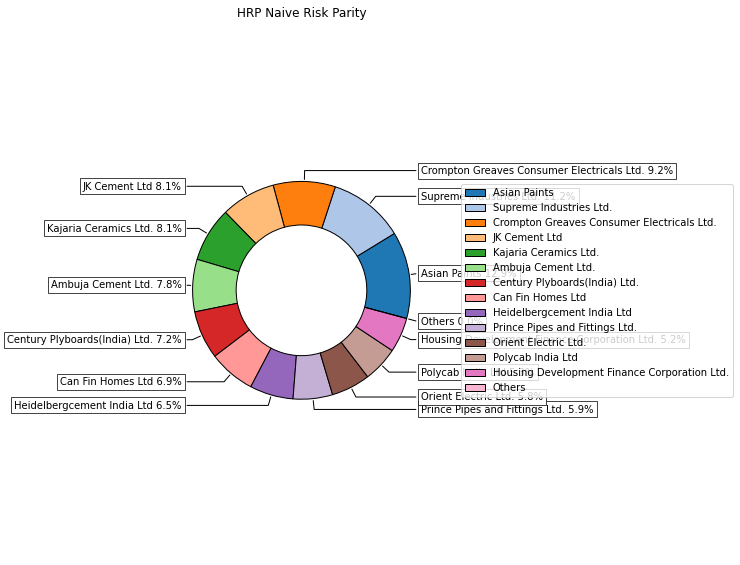

In [15]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

**Compared to classical portfolio optimization models that are based on convex programming problems, this technique produces most diversified portfolios.**

**On the other hand, HRP produces portfolios that better distribute risk among all assets. To see this property, we can plot the risk contribution per asset using the following code:**

# 5. Plotting the risk contribution per asset

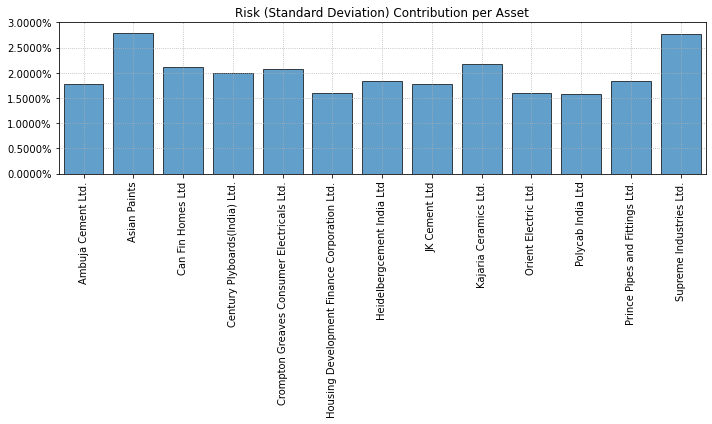

In [16]:
# Plotting the risk contribution per asset

mu = data.mean()
cov = data.cov() # Covariance matrix
returns = data # Returns of the assets

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

**Link Used**
https://medium.com/@orenji.eirl/hierarchical-risk-parity-with-python-and-riskfolio-lib-c0e60b94252e

In [19]:
mu = data.mean()

In [20]:
w

,weights
Ambuja Cement Ltd.,7.7739%
Asian Paints,12.9104%
Can Fin Homes Ltd,6.9456%
Century Plyboards(India) Ltd.,7.1709%
Crompton Greaves Consumer Electricals Ltd.,9.2214%
Housing Development Finance Corporation Ltd.,5.1627%
Heidelbergcement India Ltd,6.4651%
JK Cement Ltd,8.1130%
Kajaria Ceramics Ltd.,8.0994%
Orient Electric Ltd.,5.7861%


In [30]:
orginal_weights= pd.read_csv("data1_weights.csv",index_col=0)/100
orginal_weights

,Weight%
Companies,
Ambuja Cement Ltd.,6.6200%
Asian Paints,10.1900%
Can Fin Homes Ltd,4.9900%
Century Plyboards(India) Ltd.,6.0800%
Crompton Greaves Consumer Electricals Ltd.,8.6900%
Housing Development Finance Corporation Ltd.,9.0300%
Heidelbergcement India Ltd,7.5000%
JK Cement Ltd,7.1000%
Kajaria Ceramics Ltd.,8.1300%


In [34]:
np.dot(w['weights'],mu)*252*100

49.85898060770235

In [35]:
np.dot(orginal_weights['Weight%'],mu)*252*100

48.00081831717578